#Ejercicios de listas enlazadas

1. Escriba una función que imprima en orden inverso los elementos de una lista enlazada. Para hacerlo, recorra la lista y vaya apilando cada elemento en una pila. Cuando alcance el fin de la lista enlazada, extraiga repetidamente el tope hasta que esta quede vacía.

Usemos la implementación de listas vistas en clases.

In [ ]:
class Nodo:
    def __init__(self, info, sgte=None):
        self.info=info
        self.sgte=sgte
class Lista:
    def __init__(self):
        self.primero=None
        
    def insertar_al_inicio(self,info):
        self.primero=Nodo(info,self.primero)
    
    def insertar_despues_de(self,p,info): # inserta después de nodo p
        p.sgte=Nodo(info,p.sgte)
    
    def eliminar_al_inicio(self):
        assert self.primero is not None
        self.primero=self.primero.sgte
    
    def eliminar_sgte_de(self,p): # elimina el nodo siguiente de p
        assert p.sgte is not None
        p.sgte=p.sgte.sgte
    
    def k_esimo(self,k): # retorna k-esimo nodo, o None si fuera de rango
        p=self.primero
        j=1
        while p is not None:
            if j==k:
                return p
            p=p.sgte
            j+=1
        return None
    
    def imprimir(self):
        p=self.primero
        while p is not None:
            print(p.info, end=" ")
            p=p.sgte
        print()

In [ ]:
class Pila:
    def __init__(self):
        self.tope=None
    def push(self,x):
        self.tope=Nodo(x,self.tope)
    def pop(self):
        assert self.tope is not None
        x=self.tope.info
        self.tope=self.tope.sgte
        return x
    def is_empty(self):
        return self.tope is None

In [ ]:
l = Lista()
l.insertar_al_inicio(3)
l.insertar_al_inicio(14)
l.insertar_al_inicio(35)
l.insertar_al_inicio(7)
l.insertar_al_inicio(12)
l.insertar_al_inicio(4)
l.insertar_al_inicio(89)
l.insertar_al_inicio(70)
l.insertar_al_inicio(61)

l.imprimir()


61 70 89 4 12 7 35 14 3 


In [ ]:
# impInverso: Lista -> None
# imprime en orden los elementos de la lista que 
# recibe como parámetro.

def impInverso(lista):

  p = Pila()

  puntero = lista.primero
  while True:
      if puntero == None:
        break
      
      valor = puntero.info

      p.push(valor)

      puntero = puntero.sgte

  while not p.is_empty():

    print(p.pop(), end=" ")

impInverso(l)





3 14 35 7 12 4 89 70 61 

2. Modificar la implementación de la lista doblemente enlazada para resolver el mismo problema, pero que siga el esquema a continuación.

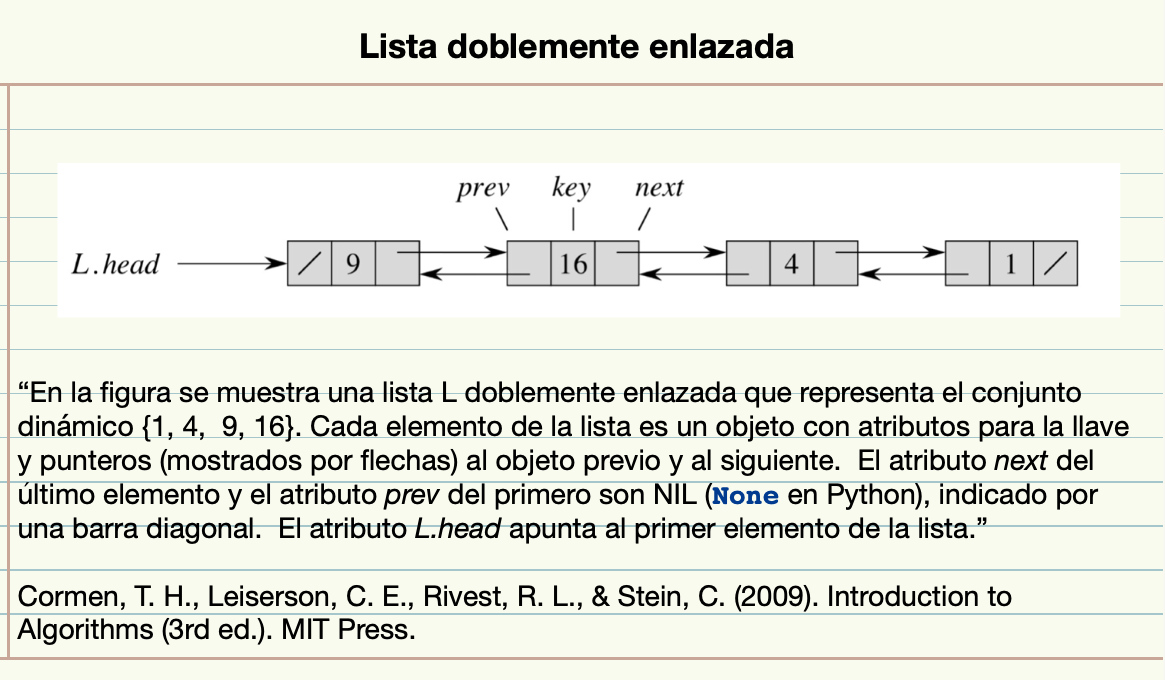

In [ ]:
# Código en construcción

class NodoDobleEnlace:
  def __init__(self, info, sgte=None, prev=None):
        self.info=info
        self.sgte=sgte
        self.prev=prev
class Lista_doble_enlace:
    def __init__(self):
        self.cabecera=NodoDobleEnlace(None,0,None)
        self.cabecera.prev=self.cabecera
        self.cabecera.sgte=self.cabecera
    
    def insertar_despues_de(self,p,info): # inserta después de nodo p
        r=p.sgte
        p.sgte=r.prev=Nodo(p,info,r)
 
    def eliminar(self,p): # elimina el nodo p
        assert p is not self.cabecera
        (p.prev.sgte,p.sgte.prev)=(p.sgte,p.prev)
    
    def k_esimo(self,k): # retorna k-esimo nodo, o None si fuera de rango
        p=self.cabecera
        j=0
        while True:
            if j==k:
                return p
            p=p.sgte
            if p is self.cabecera:
                return None
            j+=1
    
    def ascendente(self):
        p=self.cabecera.sgte
        while p is not self.cabecera:
            yield p.info
            p=p.sgte

    def descendente(self):
        p=self.cabecera.prev
        while p is not self.cabecera:
            yield p.info
            p=p.prev